In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [8]:
zip_path = 'C:/Users/sowmya/Downloads/titanic.zip'
file_inside_zip = 'train.csv'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extract(file_inside_zip)
    df = pd.read_csv(file_inside_zip)

In [9]:
df.shape

(891, 12)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.drop(columns=['Cabin'],inplace=True)

In [17]:
# Option 1: Fill NaN values in 'Age' column using loc
df.loc[df['Age'].isna(), 'Age'] = df['Age'].mean()

# Option 2: Fill NaN values in 'Age' column using fillna on the entire DataFrame
df.fillna({'Age': df['Age'].mean()}, inplace=True)

# Option 3: Assign the result of fillna back to the column
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Option 4: Use np.where to conditionally fill NaN values in 'Age' column
import numpy as np
df['Age'] = np.where(df['Age'].isna(), df['Age'].mean(), df['Age'])


In [19]:
# Option 1: Use df.fillna() directly on the DataFrame
df['Embarked'].fillna('S', inplace=True)  # Fill NaN values in 'Embarked' column inplace

# Option 2: Use loc or iloc to assign the filled values
df.loc[df['Embarked'].isna(), 'Embarked'] = 'S'  # Fill NaN values in 'Embarked' column using loc

# Option 3: Assign the result of fillna back to the column
df['Embarked'] = df['Embarked'].fillna('S')  # Fill NaN values in 'Embarked' column and assign back to the column


In [20]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [21]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [22]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [24]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Out of 891, 62% people died in the accident


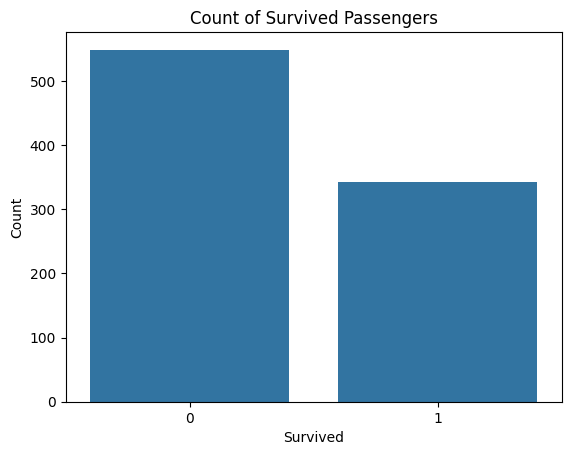

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using barplot instead of countplot for vertical bar graph
sns.barplot(x=df['Survived'].value_counts().index, y=df['Survived'].value_counts())
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Count of Survived Passengers')

death_percent = round((df['Survived'].value_counts(normalize=True) * 100).loc[0])
print(f"Out of 891, {death_percent}% people died in the accident")

plt.show()


Percentage of passengers in each class:
Pclass
3    55.11
1    24.24
2    20.65
Name: proportion, dtype: float64


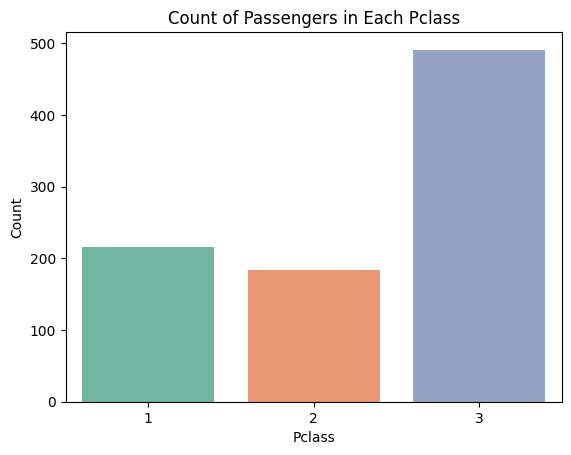

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentage of each Pclass
pclass_percent = (df['Pclass'].value_counts(normalize=True) * 100).round(2)

print("Percentage of passengers in each class:")
print(pclass_percent)

# Vertical count plot with different colors using hue
sns.countplot(x='Pclass', hue='Pclass', data=df, palette='Set2', legend=False)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Count of Passengers in Each Pclass')

plt.show()


Percentage of passengers by Sex:
Sex
male      64.76
female    35.24
Name: proportion, dtype: float64


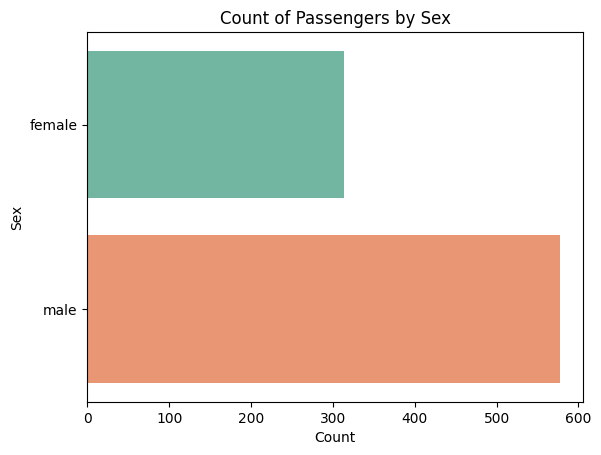

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentage of each Sex
sex_percent = (df['Sex'].value_counts(normalize=True) * 100).round(2)

print("Percentage of passengers by Sex:")
print(sex_percent)

# Vertical count plot for Sex column with different colors using hue
sns.countplot(y='Sex', hue='Sex', data=df, palette='Set2', legend=False)
plt.xlabel('Count')
plt.ylabel('Sex')
plt.title('Count of Passengers by Sex')

plt.show()


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: ylabel='count'>

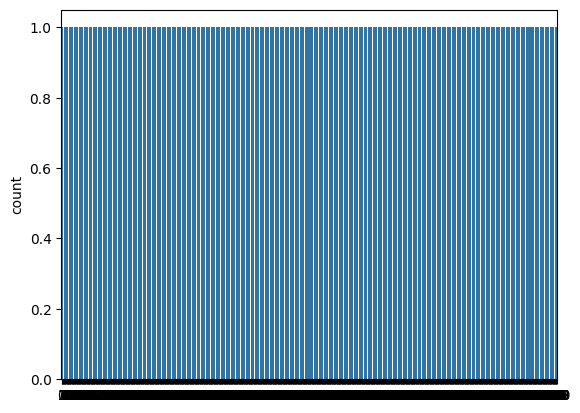

In [36]:
print(df['SibSp'].value_counts())

sns.countplot(df['SibSp'])

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: ylabel='count'>

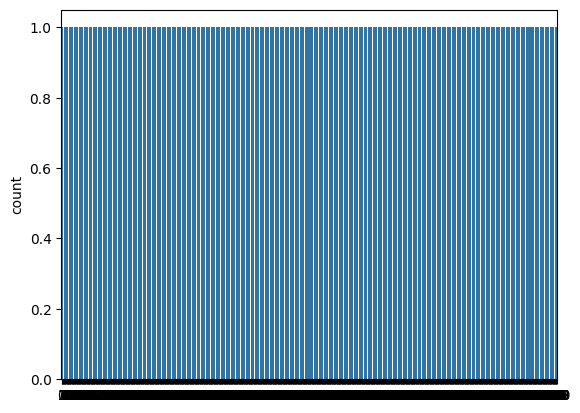

In [37]:
print((df['Parch'].value_counts()/891)*100)

sns.countplot(df['Parch'])

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Embarked'>

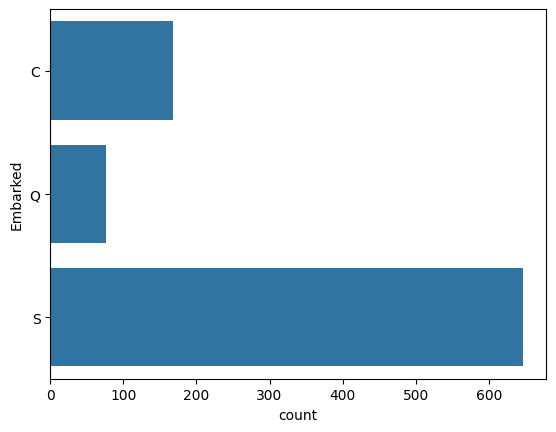

In [38]:

print((df['Embarked'].value_counts()/891)*100)

sns.countplot(df['Embarked'])

C:\Users\sowmya\AppData\Local\Temp\ipykernel_19312\747997586.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


0.45956263424701577
0.9865867453652877


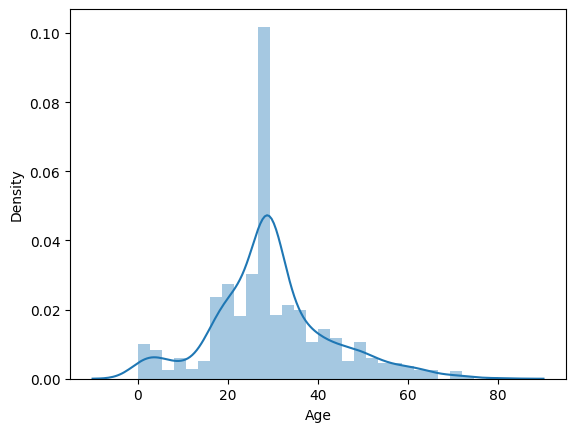

In [39]:
# Age column

sns.distplot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())

<Axes: ylabel='Age'>

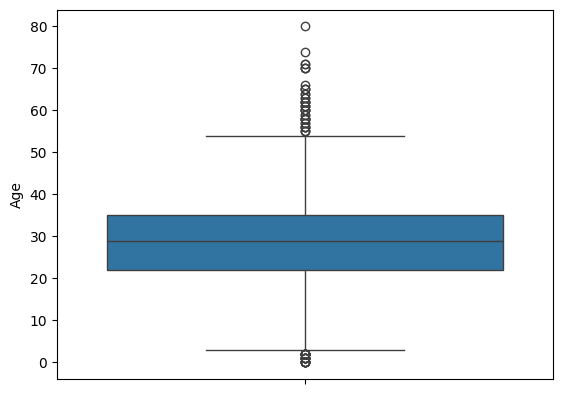

In [40]:
sns.boxplot(df['Age'])

In [41]:
# Just out of curiosity

print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


C:\Users\sowmya\AppData\Local\Temp\ipykernel_19312\1811918685.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

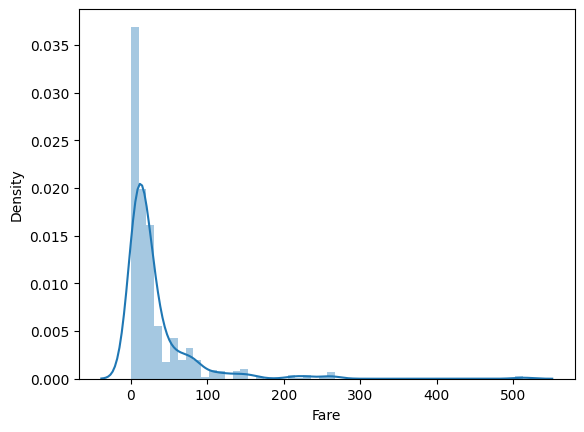

In [46]:
# Fare column

sns.distplot(df['Fare'])

In [47]:
print(df['Fare'].skew())
print(df['Fare'].kurt())


4.787316519674893
33.39814088089868


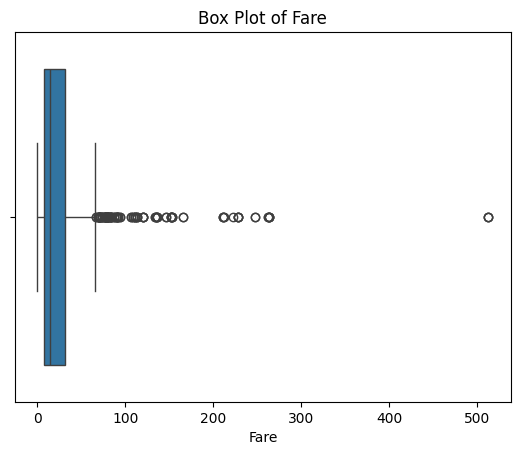

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vertical box plot for 'Fare' column
sns.boxplot(x=df['Fare'])
plt.xlabel('Fare')
plt.title('Box Plot of Fare')

plt.show()


In [51]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


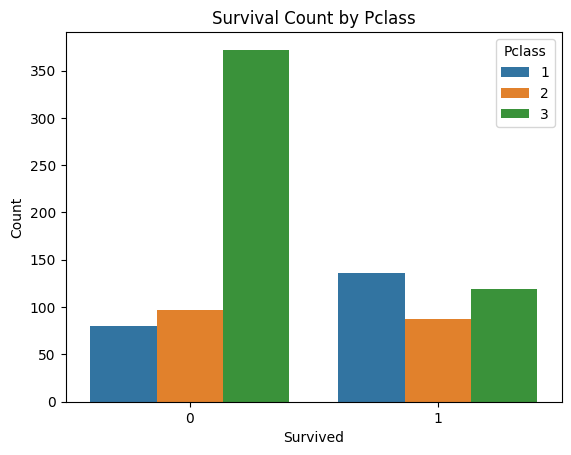

Survived     0     1
Pclass              
1         37.0  63.0
2         52.7  47.3
3         75.8  24.2


In [56]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the dataframe is correctly loaded
# df = pd.read_csv('path_to_your_csv') # Uncomment and modify with your actual CSV path

# Multivariate Analysis

# Survival with Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count by Pclass')
plt.show()

# Crosstab calculation
crosstab = pd.crosstab(df['Pclass'], df['Survived'])
percent_crosstab = crosstab.apply(lambda r: round((r / r.sum()) * 100, 1), axis=1)

print(percent_crosstab)


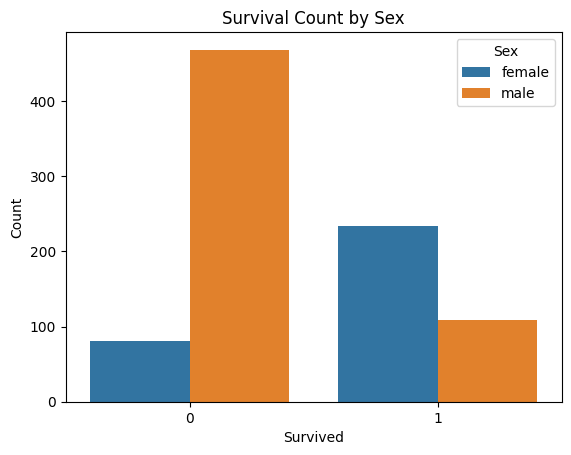

Survived     0     1
Sex                 
female    25.8  74.2
male      81.1  18.9


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the dataframe is correctly loaded
# df = pd.read_csv('path_to_your_csv') # Uncomment and modify with your actual CSV path

# Survival with Sex plot
sns.countplot(x='Survived', hue='Sex', data=df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.show()

# Crosstab calculation
crosstab = pd.crosstab(df['Sex'], df['Survived'])
percent_crosstab = crosstab.apply(lambda r: round((r / r.sum()) * 100, 1), axis=1)

print(percent_crosstab)


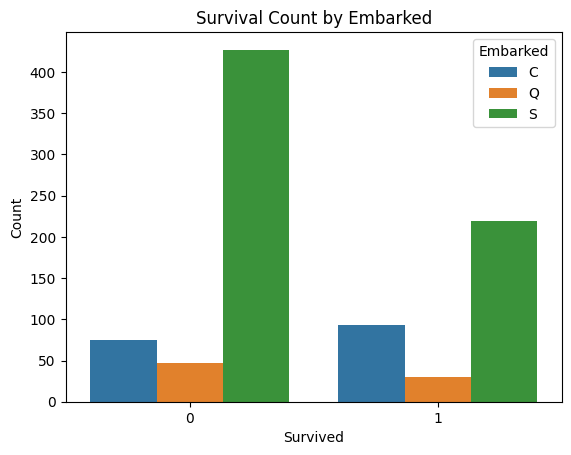

Survived     0     1
Embarked            
C         44.6  55.4
Q         61.0  39.0
S         66.1  33.9


In [59]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the dataframe is correctly loaded
# df = pd.read_csv('path_to_your_csv') # Uncomment and modify with your actual CSV path

# Survival with Embarked
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count by Embarked')
plt.show()

# Crosstab calculation
crosstab = pd.crosstab(df['Embarked'], df['Survived'])
percent_crosstab = crosstab.apply(lambda r: round((r / r.sum()) * 100, 1), axis=1)

print(percent_crosstab)


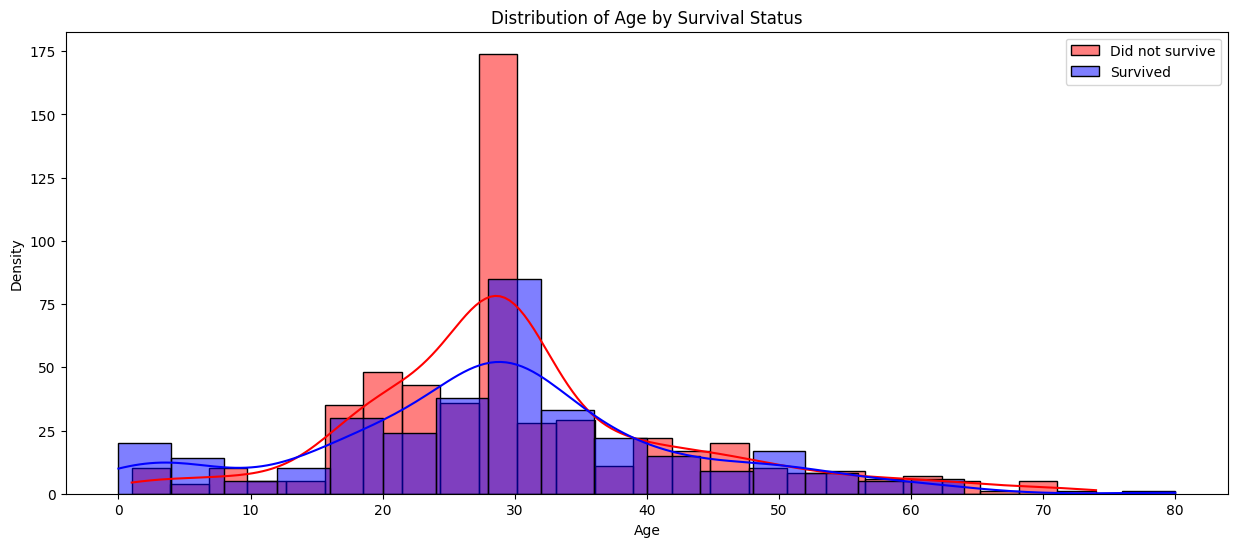

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, label='Did not survive', color='red')
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, label='Survived', color='blue')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age by Survival Status')
plt.legend()
plt.show()


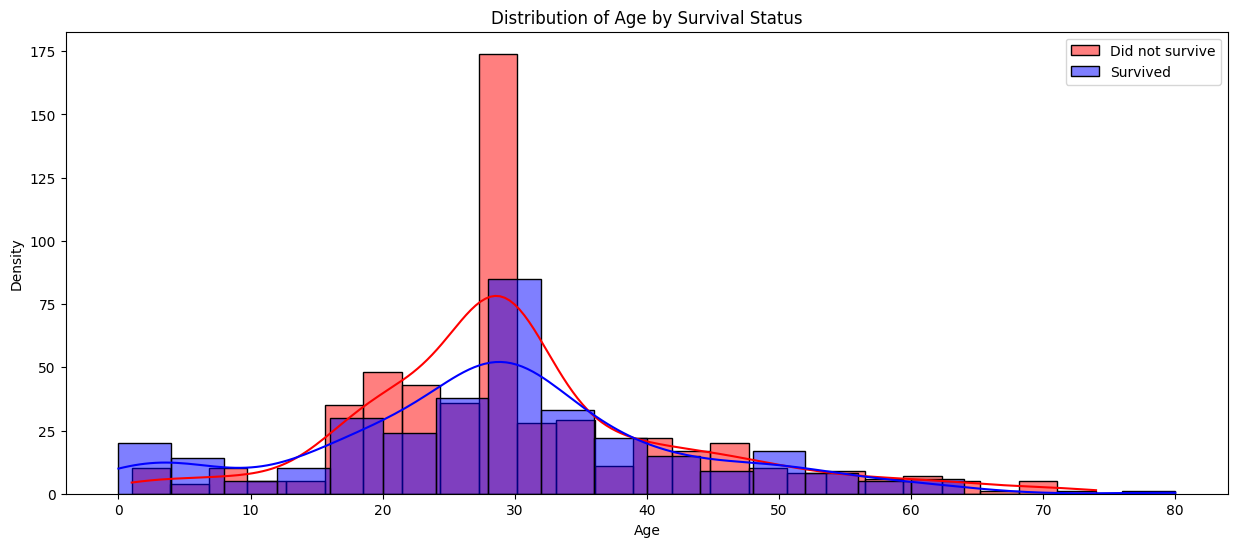

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, label='Did not survive', color='red')
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, label='Survived', color='blue')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age by Survival Status')
plt.legend()
plt.show()


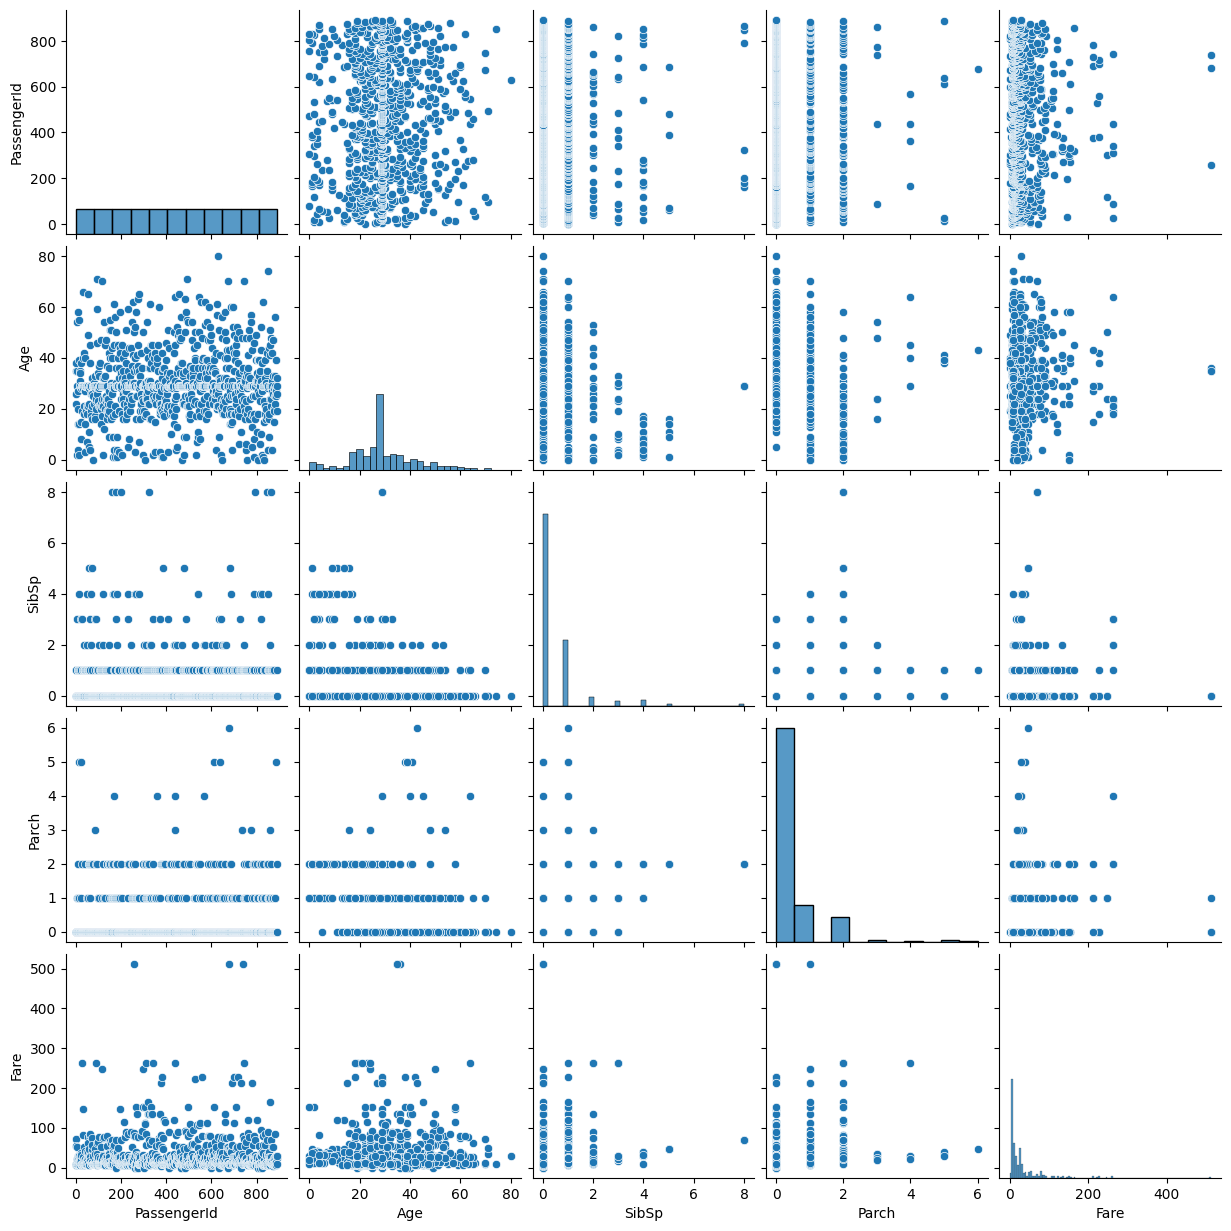

In [64]:
sns.pairplot(df)

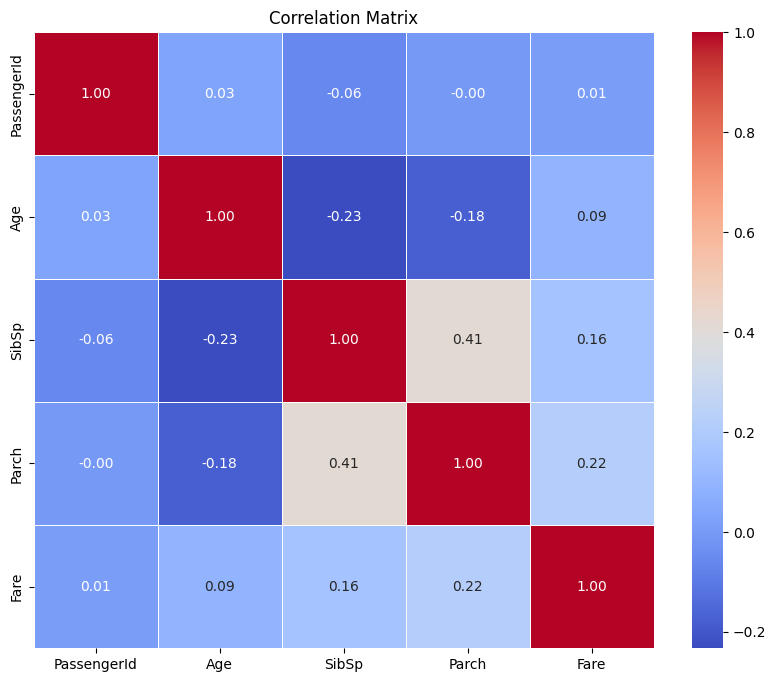

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [68]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']

In [69]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
601,602,0,3,"Slabenoff, Mr. Petco",male,29,0,0,349214,7.8958,S,0
466,467,0,2,"Campbell, Mr. William",male,29,0,0,239853,0.0000,S,0
838,839,1,3,"Chip, Mr. Chang",male,32,0,0,1601,56.4958,S,0
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18,2,0,345764,18.0000,S,2
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30,0,0,C 7076,7.2500,S,0


In [70]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [71]:

df['family_type']=df['family_size'].apply(family_type)

In [72]:

df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
660,661,1,1,"Frauenthal, Dr. Henry William",male,50,2,0,PC 17611,133.6500,S,2,Medium
658,659,0,2,"Eitemiller, Mr. George Floyd",male,23,0,0,29751,13.0000,S,0,Alone
188,189,0,3,"Bourke, Mr. John",male,40,1,1,364849,15.5000,Q,2,Medium
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16,0,1,111361,57.9792,C,1,Medium
313,314,0,3,"Hendekovic, Mr. Ignjac",male,28,0,0,349243,7.8958,S,0,Alone


In [73]:

# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [74]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
540,541,1,1,"Crosby, Miss. Harriet R",female,36,WE/P 5735,71.0000,S,Medium
508,509,0,3,"Olsen, Mr. Henry Margido",male,28,C 4001,22.5250,S,Alone
612,613,1,3,"Murphy, Miss. Margaret Jane",female,29,367230,15.5000,Q,Medium
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57,219533,12.3500,Q,Alone
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19,11752,26.2833,S,Medium


In [75]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


In [76]:
# handling outliers in age(Almost normal)

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

In [77]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [78]:
# One hot encoding

df.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,False,True,True,False,True,False,True
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,False,True,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,False,False,False,False,True,False,True
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,False,True,True,False,True,False,False
5,6,0,"Moran, Mr. James",29,330877,8.4583,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,True,False,True,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,False,False,False,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,False,True,False,False,True,False,True
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,False,False,True,False,False,False,False


In [79]:
df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

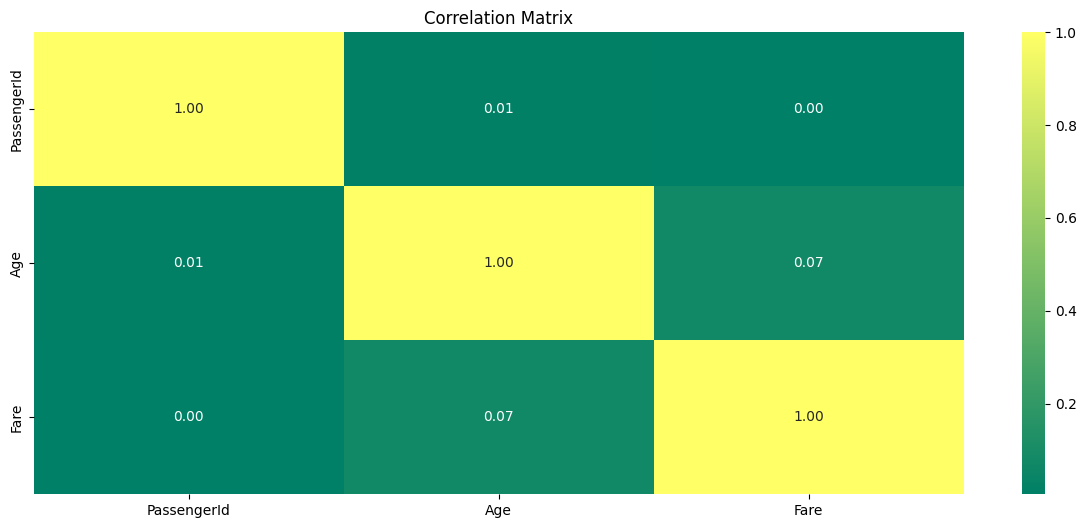

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, cmap='summer', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
